In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load The Dataset

In [17]:
df = pd.read_csv("../dataset/Algerian_forest_fires_dataset_UPDATE.csv")

"""

../: This means "go up one directory level." If you're in the models folder, it will take you up to the Project folder.

dataset/: Now, look inside the dataset folder within the Project folder.

Algerian_forest_fires_dataset_UPDATE.csv: Finally, this is the name of the file you want to read.

"""

'\n\n../: This means "go up one directory level." If you\'re in the models folder, it will take you up to the Project folder.\n\ndataset/: Now, look inside the dataset folder within the Project folder.\n\nAlgerian_forest_fires_dataset_UPDATE.csv: Finally, this is the name of the file you want to read.\n\n'

In [18]:
df.head()

,,,,,,,,,,,,,Bejaia Region Dataset
day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire


# Set the Header

In [19]:
df  = pd.read_csv("../dataset/Algerian_forest_fires_dataset_UPDATE.csv" , header= 1)

In [20]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [21]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


# Data Cleaning

In [22]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [23]:
# Rows that have single or multiple values

df[df.isna().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


### Divide the dataset into two Regions

In [24]:
df.loc[:122 , "Region"]= 0
df.loc[122: , "Region"]= 1


In [26]:
df["Region"] = df["Region"].astype(int)

In [27]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [28]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1


In [29]:
df.isna().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [30]:
# Remove rows tha hav single or multiple null values
df = df.dropna().reset_index(drop= True)

In [31]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [32]:
# Find String rows in the Data Frame

df.iloc[[122]]   # columns that have string . Note we alredy know that at this index the row is string .
# But what about if we don't  which row have a single string value or multiple string values



,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [33]:
# let's find string rows in a df

# string_rows = df[df.applymap(lambda x: isinstance(x ,str)).any(axis = 1)]

In [34]:
df = df.drop(122).reset_index(drop= True)

In [35]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


# Store the Clean Data

In [38]:
df.to_csv("../dataset/Algerisn_Forest_Clean.csv" , index= False)

# Load the Clean Dataset

In [43]:
df = pd.read_csv("../dataset/Algerisn_Forest_Clean.csv")

In [44]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


# EDA

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4    RH          243 non-null    int64  
 5    Ws          243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [46]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [47]:
# drop day , month , year

df.columns = df.columns.str.strip()

df = df.drop(['day','month', 'year'] , axis=1).reset_index(drop=True)

In [48]:
# Finding String rows 

string_rows = df[df.applymap(lambda x : isinstance(x , str)).any(axis = 1)]
string_rows

C:\Users\Tariq Ullah\AppData\Local\Temp\ipykernel_10728\1448844553.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  string_rows = df[df.applymap(lambda x : isinstance(x , str)).any(axis = 1)]


,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


## Removing White space from Columns names

In [50]:
df.columns = df.columns.str.strip()
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

# Encoding Categoreis

In [51]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [52]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire') , 0 , 1) # if note fire replace with 0 else replace by 1

In [53]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [54]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [55]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


# Feature Selection

<Axes: >

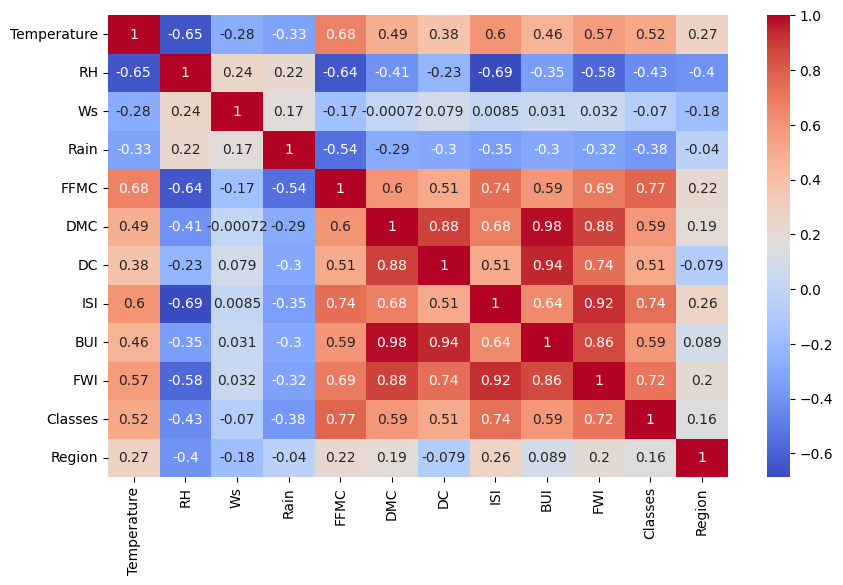

In [56]:
plt.figure(figsize=(10 , 6))
sns.heatmap(df.corr() , annot= True , cmap='coolwarm')

# Dividing Dataset into Independent and Dependent Features

In [57]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

### Separating Independent Features

In [58]:
X = []
for column in df.columns:
    if column != 'FWI':
        X.append(column)

In [59]:
X

['Temperature',
 'RH',
 'Ws',
 'Rain',
 'FFMC',
 'DMC',
 'DC',
 'ISI',
 'BUI',
 'Classes',
 'Region']

In [61]:
# Seperate independent Features
X = df.drop(X , axis= 1)  # indpendent Features Extraction
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [62]:

X.ndim

2

In [63]:
X.shape

(243, 11)

### Seperating  Dependent/ Output Feature

In [66]:
y = df["FWI"]   # Dependent Featur  . It must be 1-d
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [67]:
y.ndim , y.shape

(1, (243,))

# Dividing Dataset into Train and Test Dataset

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25 , random_state= 42)

In [75]:
X_train.shape , X_test.shape

((182, 11), (61, 11))

In [76]:
y_train.shape , y_test.shape

((182,), (61,))

# Multicolinearity

## Remove Indepedent Features that have High(same) Correlation with each other

In [77]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

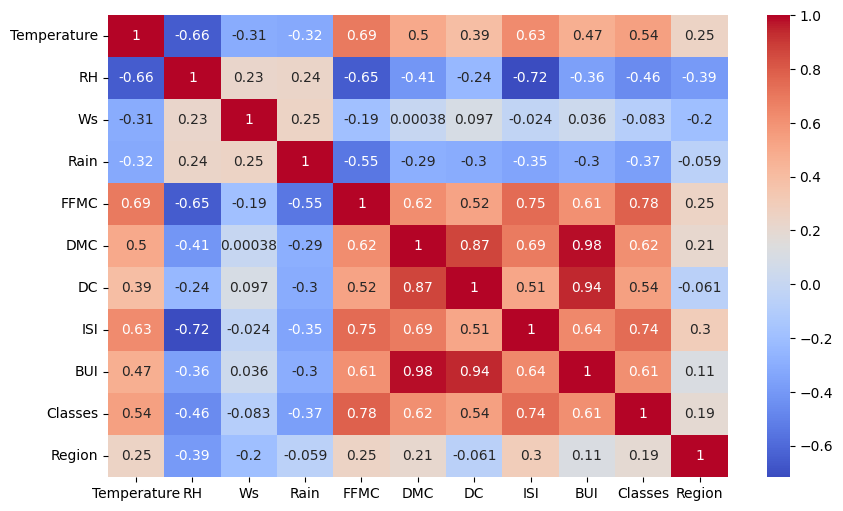

In [115]:
plt.figure(figsize=(10 , 6))
sns.heatmap(X_train.corr() , annot= True , cmap= "coolwarm")

# Filtering High Correlated Independent Features

In [78]:
# Faking Function that Filter High Correlated Independent Features

def correlation(dataset , threshould):
    col_corr = set()              # set of columns that are correlated
    corr_matrix = dataset.corr()  # store the corr of dataset in corr matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs( corr_matrix.iloc[i , j] > threshould):
                column = corr_matrix.columns[i]
                col_corr.add(column)
    return col_corr



In [80]:
# Threshould is decided by Domain Expertise

corr_features = correlation( X_train , 0.85)
corr_features    # These Independent Features have high correlation with others indepedent Features

{'BUI', 'DC'}

<Axes: >

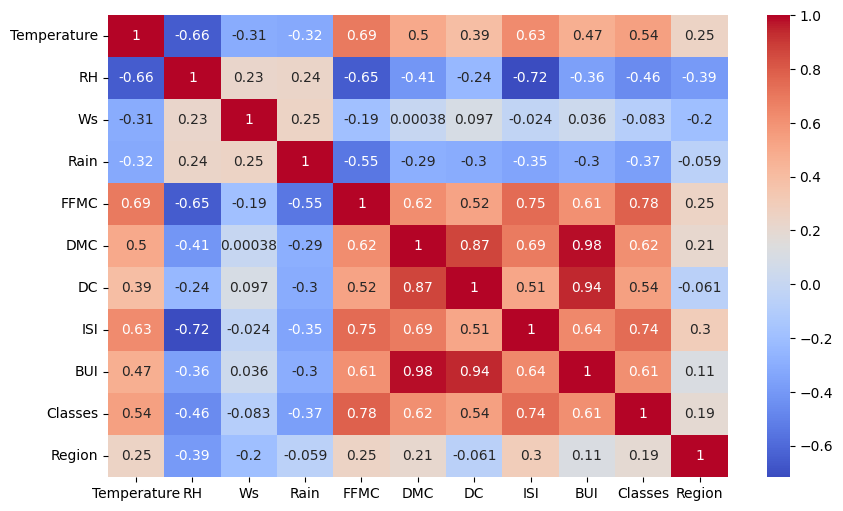

In [81]:
# Let's see how the have correlation
plt.figure(figsize=(10 , 6))
sns.heatmap(X_train.corr() , annot= True , cmap='coolwarm')

## Drop High Correlated indpendent Features from Train and Test Dataset

In [82]:
X_train.drop( corr_features , axis = 1 , inplace= True)  # drop corr features from train dataset
X_test.drop( corr_features , axis= 1 , inplace= True)    # drop corr features from Test Dataset

In [83]:
X_train.shape , X_test.shape   # shape is reduece to by 3 b/c 3 columns is removed

((182, 9), (61, 9))

# Feature Scaling or Standardization

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()

In [86]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

In [87]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[-3.01758418e-01,  1.15223531e-01, -2.19053977e-01,
        -3.84060174e-01,  6.33218240e-01, -4.25075679e-02,
         2.03772218e-01,  9.05538514e-01, -9.89070710e-01],
       [ 2.39325642e-01, -5.52632606e-01, -9.78441098e-01,
        -3.84060174e-01,  7.37980727e-01, -3.83352062e-01,
         3.65823283e-01,  9.05538514e-01, -9.89070710e-01],
       [-1.11338451e+00, -2.85490151e-01,  9.20026704e-01,
         6.45241658e-01, -9.73139891e-01, -9.14435344e-01,
        -8.37984627e-01, -1.10431526e+00,  1.01105006e+00],
       [ 5.09867672e-01, -2.85490151e-01, -9.78441098e-01,
        -2.90487280e-01,  1.30358303e-01,  3.14190159e-01,
        -6.29633258e-01, -1.10431526e+00,  1.01105006e+00],
       [-5.72300448e-01,  1.82009145e-01, -5.98747538e-01,
        -3.84060174e-01,  5.42424085e-01,  1.00171523e-01,
        -7.40296073e-02,  9.05538514e-01,  1.01105006e+00],
       [ 1.86257782e+00,  1.15223531e-01, -2.49721534e+00,
         1.77377189e-01, -2.67739147e-01, -2.406729

# Box Plot to undestand the Effect of Standard Scaler

Text(0.5, 1.0, 'After Scaling')

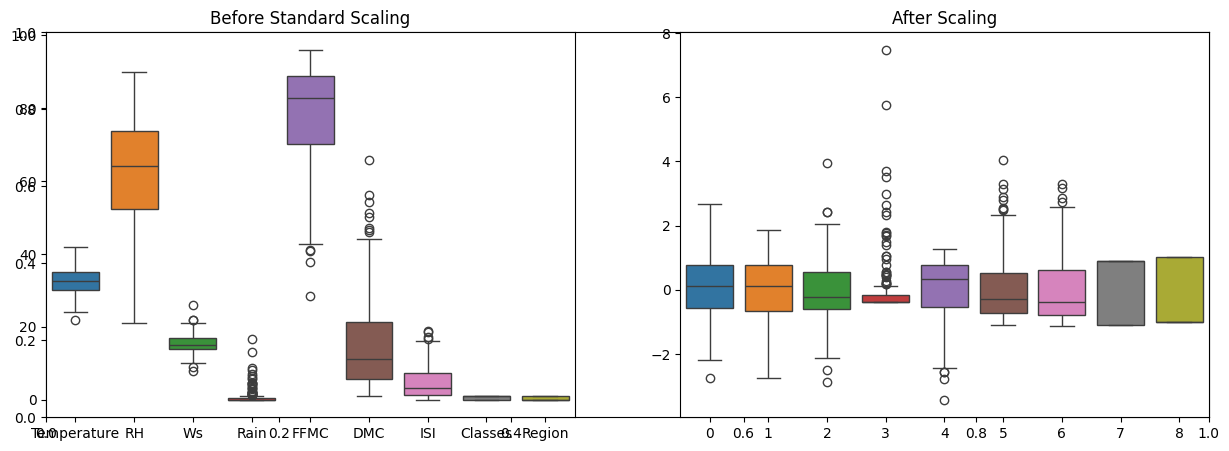

In [88]:
plt.subplots(figsize=(15 ,5))
plt.subplot(1,2,1)
sns.boxplot(X_train)
plt.title("Before Standard Scaling")

# ist write each line and then execute to understand better

plt.subplot(1,2,2)
sns.boxplot(data = X_train_scaled)
plt.title("After Scaling")


# Linear Regression Model

In [89]:
from sklearn.linear_model import LinearRegression

In [90]:
regressor = LinearRegression()
regressor.fit(X_train_scaled , y_train)
y_predicted = regressor.predict(X_test_scaled) 


# Model Evluation or Meterics Performance

In [91]:
from  sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score

In [92]:
mse = mean_squared_error(y_test , y_predicted)
mae = mean_absolute_error(y_test , y_predicted)
r_square = r2_score(y_test , y_predicted)

print("MSE = ", mse)
print('MAE =' , mae)
print("R Square = ", r_square)

MSE =  0.674276687379158
MAE = 0.5468236465249978
R Square =  0.9847657384266951


# Lasso Regression

In [93]:
from sklearn.linear_model import Lasso

In [94]:
lasso_regressor = Lasso()

In [95]:
lasso_regressor.fit(X_train_scaled , y_train)  # Model is trained

Lasso()

In [96]:
lasso_regressor.intercept_  # It have only one intercept

np.float64(7.156043956043957)

In [97]:
lasso_regressor.coef_  # It have coeffient/slope  upto the number of independent features

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
        2.99025157,  4.00824747,  0.        , -0.        ])

In [98]:
y_predicted = lasso_regressor.predict(X_test_scaled)  # y_predicted

# Model Evaluation / Performence Metrics

In [99]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [100]:
mse = mean_squared_error( y_test , y_predicted)
mae = mean_absolute_error(y_test , y_predicted)
r_square = r2_score(y_test , y_predicted)

print('MSE = ', mse)
print("MAE = ", mae )
print("R Square = ", r_square )

MSE =  2.2483458918974772
MAE =  1.133175994914409
R Square =  0.9492020263112388


# Ridge Regression

In [101]:
from sklearn.linear_model import Ridge

In [102]:
ridge_regressor = Ridge()

In [103]:
ridge_regressor.fit(X_train_scaled , y_train)  # Model is trained

Ridge()

In [104]:
ridge_regressor.intercept_

np.float64(7.156043956043957)

In [105]:
ridge_regressor.coef_  

array([-0.02692577, -0.20519212,  0.02554428, -0.04069202, -0.78583006,
        3.68286744,  4.74488835,  0.43423672, -0.38466214])

In [106]:
y_predicted = ridge_regressor.predict(X_test_scaled)

# Model Evaluation / performence Metrics

In [107]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [108]:
mse = mean_squared_error(y_test , y_predicted)
mae = mean_absolute_error(y_test , y_predicted)
r_square = r2_score(y_test , y_predicted)
print("MSE = " , mse)
print("MAE = ", mae)
print("R Square = ", r_square)

MSE =  0.6949198918152096
MAE =  0.5642305340105715
R Square =  0.9842993364555512


# ElasticNet Regression

In [109]:
from sklearn.linear_model import ElasticNet

In [110]:
e_regressor = ElasticNet()

In [111]:
e_regressor.fit(X_train_scaled , y_train)

ElasticNet()

In [112]:
e_regressor.intercept_

np.float64(7.156043956043956)

In [113]:
e_regressor.coef_

array([ 0.21700498, -0.46785751,  0.        , -0.        ,  0.37217213,
        2.36758116,  2.35779601,  0.87026661,  0.        ])

In [114]:
y_predicted = e_regressor.predict(X_test_scaled)

# Model Evaluation / Performence Metrics

In [115]:
mse = mean_squared_error(y_test , y_predicted)
mae = mean_absolute_error(y_test , y_predicted)
r_square = r2_score(y_test , y_predicted)
print("MSE = " , mse)
print("MAE = ", mae)
print("R Square = ", r_square)

MSE =  5.5172511010252245
MAE =  1.8822353634896005
R Square =  0.8753460589519703


# Pickling

In [116]:
import pickle

## Storing Model in  a File

In [118]:
with open('scaler.pkl' ,'wb') as f:  # scaler.pkl is the name of the file that store the below model
    pickle.dump(scaler , f) # scaler is the name of standardinzing Model

In [119]:
with open('Ridge.pkl' , 'wb') as f:
    pickle.dump(ridge_regressor , f)

## Loading Models from Pickle File

In [120]:
with open("scaler.pkl" , 'rb') as f:
    scaler_model = pickle.load(f)

with open("Ridge.pkl", 'rb') as f:
    ridge_model = pickle.load(f)